## Import the relevant libraries

The HSV channel 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
%matplotlib inline

In [6]:
## Read in the image
image = cv2.imread('C:\Ellen\Udacity\Computer_Vision\data\water-balloons.jpg')
image.shape

(331L, 500L, 3L)

In [9]:
# Make a copy of the image
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

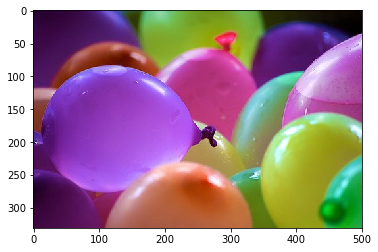

In [10]:
plt.imshow(image_copy)

## Plot color channels

In [11]:
r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

This gives the pixel values for each of the three bands. The higher the values, the brighter the values are. 

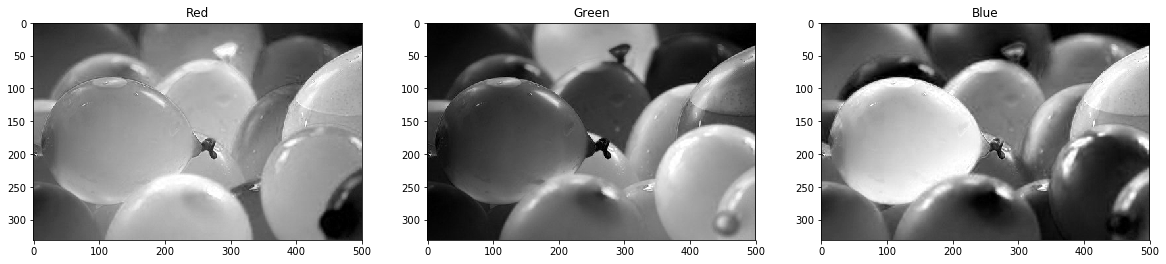

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,10))

ax1.set_title('Red')
ax1.imshow(r,cmap='gray')

ax2.set_title('Green')
ax2.imshow(g,cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b,cmap='gray')

In [17]:
## Convert from RGB to HSV
hsv = cv2.cvtColor(image_copy,cv2.COLOR_RGB2HSV)

In [18]:
# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

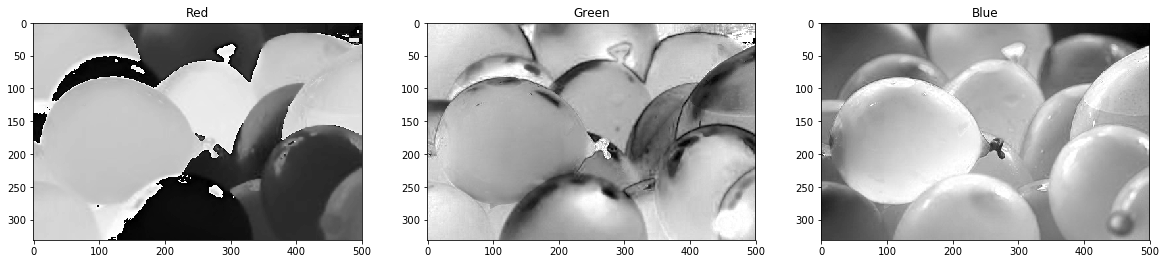

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,10))

ax1.set_title('Red')
ax1.imshow(h,cmap='gray')

ax2.set_title('Green')
ax2.imshow(s,cmap='gray')

ax3.set_title('Blue')
ax3.imshow(v,cmap='gray')

## Define pink and hue selection thresholds


In [20]:
# In RGB channel
lower_pink = np.array([180,0,100])
higher_pink = np.array([255,255,230])

In [34]:
# In HSV channel
lower_hue = np.array([160,0,0])
upper_hue = np.array([180,255,255])

In [22]:
## Mask the image

In [30]:
# RGB mask
# Define the mask area

mask_rgb = cv2.inRange(image_copy,lower_pink,higher_pink)

## Create a copy of the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]

In [31]:
unique, counts = np.unique(mask_rgb, return_counts=True)
print (unique)
print (counts)

[  0 255]
[144187  21313]


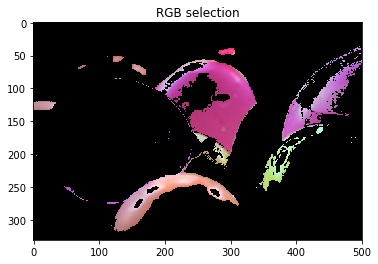

In [32]:
plt.imshow(masked_image)
plt.title('RGB selection')

In [37]:
# HSV mask

# Define the masked area
mask_hsv = cv2.inRange(hsv,lower_hue, upper_hue)

masked_image = np.copy(image_copy)
masked_image[mask_hsv==0] = [0,0,0]



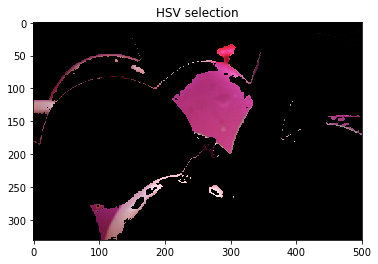

In [38]:
plt.imshow(masked_image)
plt.title('HSV selection')

The reason that one sometimes wants to go with this is because in the HSV channel, sometimes the colors come more to light. 

https://www.w3schools.com/colors/colors_picker.asp